<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Load the dataset into a dataframe.


In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


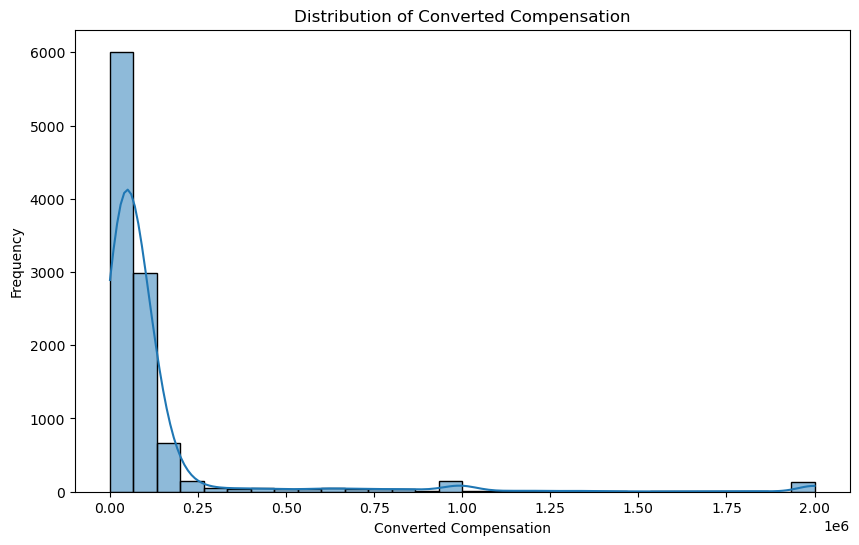

In [7]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], kde=True, bins=30)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

Plot the histogram for the column `ConvertedComp`.


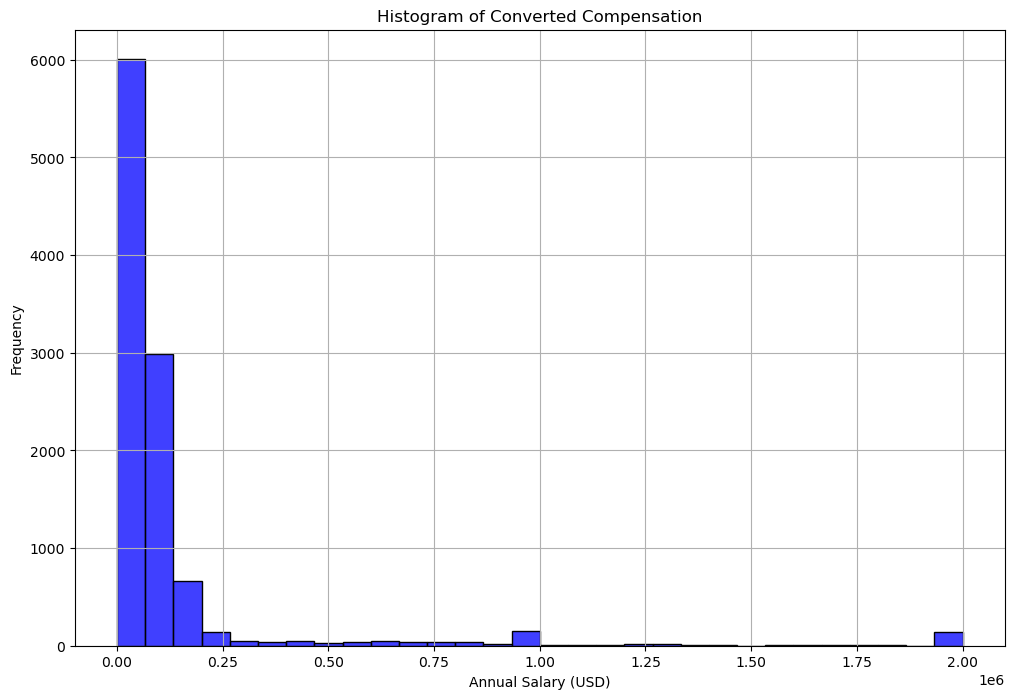

In [8]:
# your code goes here
plt.figure(figsize=(12, 8))
sns.histplot(df['ConvertedComp'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
median_salary = df['ConvertedComp'].median()
print(f"The median of the ConvertedComp column is: ${median_salary:.2f}")

The median of the ConvertedComp column is: $57745.00


How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
count_men = df[df['Gender'] == 'Man'].shape[0]
print(f"The number of responders who identified themselves only as a Man is: {count_men}")

The number of responders who identified themselves only as a Man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
# Filter the DataFrame for responders who identified as 'Woman'
df_women = df[df['Gender'] == 'Woman']

# Calculate the median of the ConvertedComp column
median_women_salary = df_women['ConvertedComp'].median()

print(f"The median ConvertedComp for responders who identified themselves only as a Woman is: ${median_women_salary:.2f}")

The median ConvertedComp for responders who identified themselves only as a Woman is: $57708.00


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# your code goes here
# Calculate the five-number summary
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

# Print the summary
print(f"Five-number summary for Age column:")
print(f"Minimum: {min_age}")
print(f"First Quartile (Q1): {q1_age}")
print(f"Median: {median_age}")
print(f"Third Quartile (Q3): {q3_age}")
print(f"Maximum: {max_age}")

Five-number summary for Age column:
Minimum: 16.0
First Quartile (Q1): 25.0
Median: 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


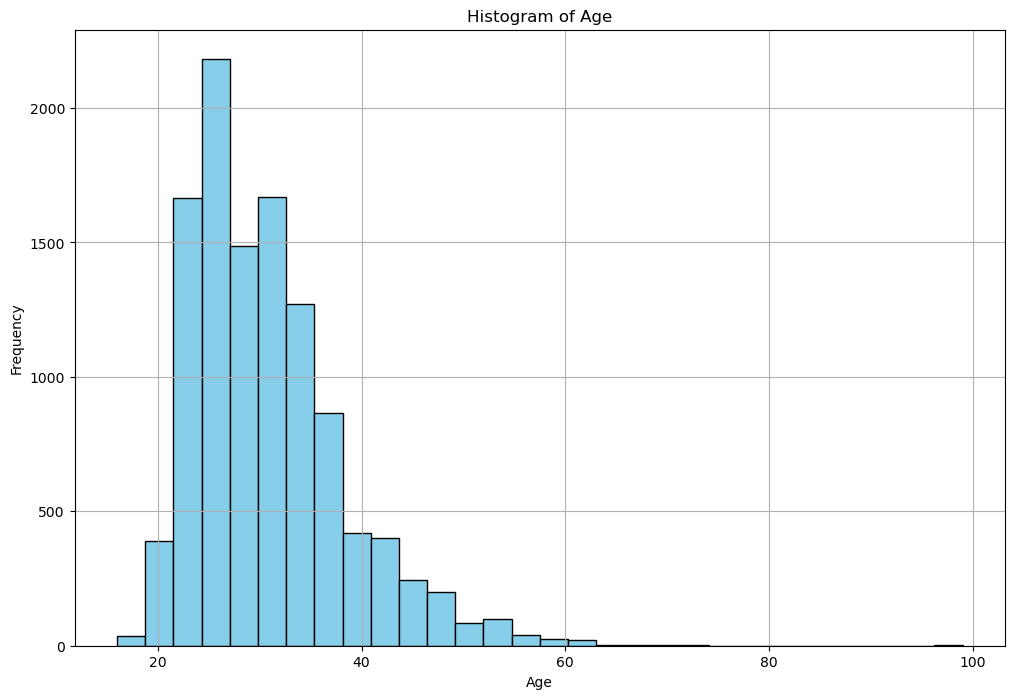

In [13]:
# your code goes here
plt.figure(figsize=(12, 8))
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


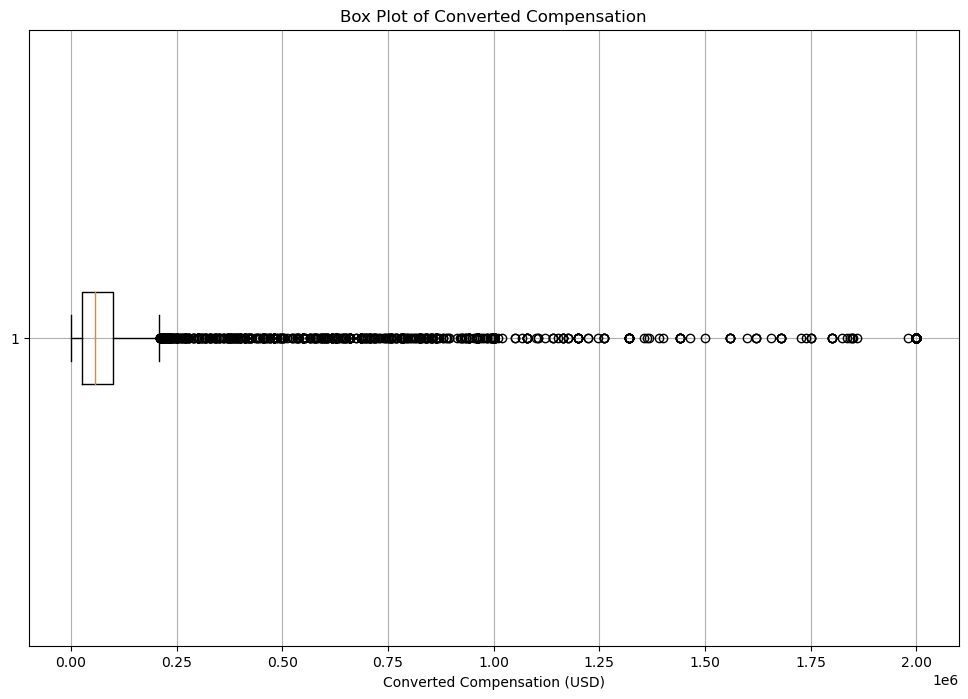

In [14]:
# your code goes here
plt.figure(figsize=(12, 8))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# your code goes here
# Calculate the first and third quartiles
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

print(f"The Interquartile Range (IQR) for the ConvertedComp column is: {iqr:.2f}")

The Interquartile Range (IQR) for the ConvertedComp column is: 73132.00


Find out the upper and lower bounds.


In [16]:
# your code goes here
# Calculate the first and third quartiles
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

Lower Bound: -82830.00
Upper Bound: 209698.00


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# your code goes here
# Calculate the first and third quartiles
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers in the ConvertedComp column: {num_outliers}")

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
# your code goes here
# Calculate the first and third quartiles
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Create a new DataFrame by removing the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Optionally, save the new DataFrame to a CSV file
df_no_outliers.to_csv('your_data_no_outliers.csv', index=False)  # Replace with your desired file path

### Median ConvertedComp Before Removing Outliers

In [26]:
# Calculate the median of the ConvertedComp column
median_convertedcomp_before = df['ConvertedComp'].median()
print(f"Median ConvertedComp before removing outliers: {median_convertedcomp_before}")

Median ConvertedComp before removing outliers: 57745.0


### Median ConvertedComp After Removing Outliers

In [28]:
# Calculate the first and third quartiles
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Create a new DataFrame by removing the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the median of the ConvertedComp column after removing outliers
median_convertedcomp_after = df_no_outliers['ConvertedComp'].median()
print(f"Median ConvertedComp after removing outliers: {median_convertedcomp_after}")

Median ConvertedComp after removing outliers: 52704.0


### Number of Outliers Below Q1 in the Boxplot of ‘Age’

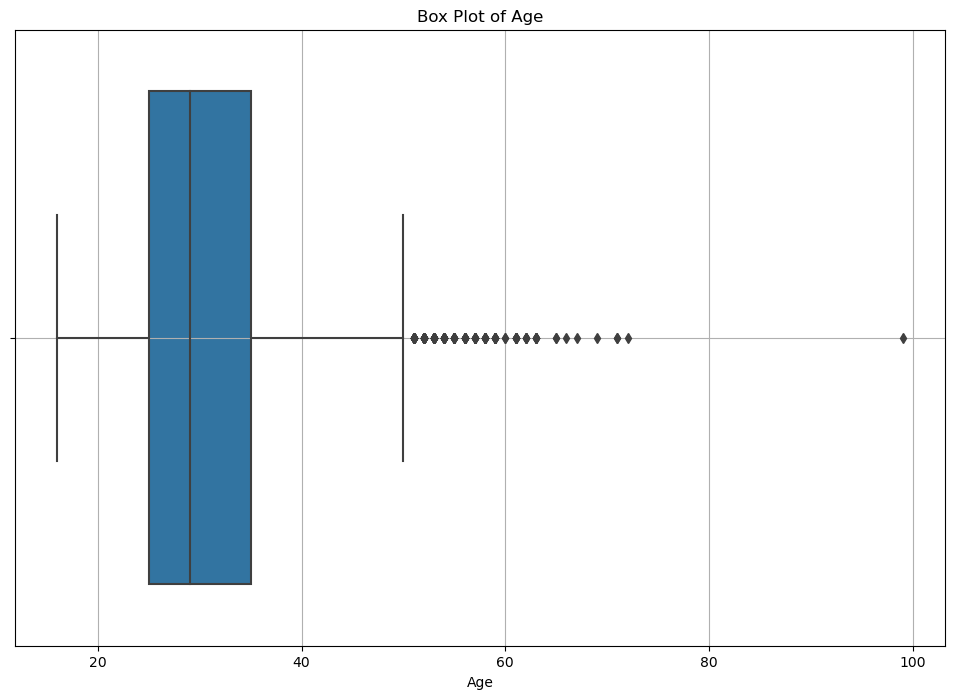

Number of outliers below Q1 in the Age column: 0


In [30]:
# Create the boxplot for Age
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

# Calculate the first quartile (Q1)
q1_age = df['Age'].quantile(0.25)

# Calculate the lower bound for outliers
lower_bound_age = q1_age - 1.5 * (df['Age'].quantile(0.75) - q1_age)

# Count the number of outliers below Q1
num_outliers_below_q1 = df[df['Age'] < lower_bound_age].shape[0]
print(f"Number of outliers below Q1 in the Age column: {num_outliers_below_q1}")

### Mean ConvertedComp After Removing Outliers

In [32]:
# Calculate the mean of the ConvertedComp column after removing outliers
mean_convertedcomp_after = df_no_outliers['ConvertedComp'].mean()
print(f"Mean ConvertedComp after removing outliers: {mean_convertedcomp_after:.2f}")

Mean ConvertedComp after removing outliers: 59883.21


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [24]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Extract the correlation of 'Age' with all other numerical columns
if 'Age' in correlation_matrix.columns:
    age_correlation = correlation_matrix['Age'].drop('Age')
    print("Correlation of Age with all other numerical columns:")
    print(age_correlation)
else:
    print("'Age' column is not present in the numerical data.")

Correlation of Age with all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
